<a href="https://colab.research.google.com/github/ximo2001/03MAIR---Algoritmos-de-Optimizacion/blob/main/Algoritmos_AG3_Ximo_Sanz_Tornero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Ximo Sanz Tornero <br>
Link:   https://colab.research.google.com/drive/1dAxVWJytAJxtHPUsBdLoO4jNG29oUQdP<br>
Github: https://github.com/ximo2001/03MAIR---Algoritmos-de-Optimizacion
<br>




In [2]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

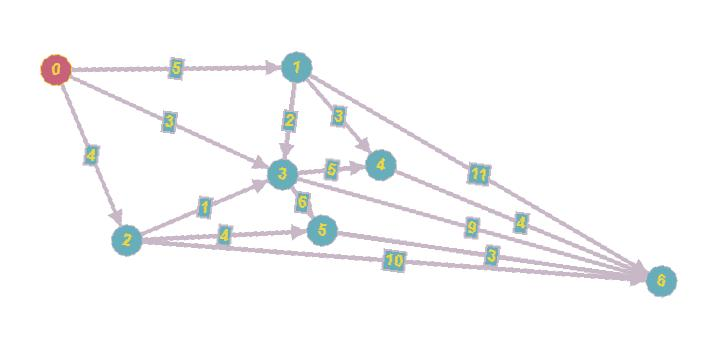

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [3]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [4]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [5]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [6]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [7]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [8]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [9]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [10]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [11]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [12]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


A continuación se presenta una versión mejorada del problema de ramificación y poda. Se ha decidido reimplementar de forma similar la versión anterior de ramificación y poda para poder crear un algortimo que compare ambas versiones.

In [13]:
import itertools
import random
import time
import sys


def generar_matriz_costes(dim, rango=(10, 30)):
    """
    Genera una matriz de costos aleatoria de tamaño dim x dim.
    Cada costo es un número entero aleatorio entre rango[0] y rango[1].
    """
    return [[random.randint(*rango) for _ in range(dim)] for _ in range(dim)]

def valor(S, COSTES):
    """
    Calcula el valor total de una solución S dada la matriz de COSTES.
    S es una tupla donde S[i] es el agente asignado a la tarea i.
    """
    VALOR = 0
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]
    return VALOR

def CI(S, COSTES):
    """
    Calcula el coste inferior para una solución parcial S.
    """
    VALOR = 0
    # Valores establecidos
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]

    # Estimación
    for i in range(len(S), len(COSTES)):
        VALOR += min(COSTES[j][i] for j in range(len(COSTES)))
    return VALOR

def crear_hijos(NODO, N):
    """
    Genera los hijos de un nodo dado.
    NODO es una tupla que representa la asignación parcial de tareas.
    N es la dimensión de la matriz de costos.
    """
    HIJOS = []
    for i in range(N):
        if i not in NODO:
            HIJOS.append({'s': NODO + (i,), 'ci': 0})  # 'ci' se calculará después
    return HIJOS

def ramificacion_y_poda(COSTES):
    """
    Algoritmo de Ramificación y Poda para resolver el problema de asignación de tareas.
    """
    DIMENSION = len(COSTES)
    MEJOR_SOLUCION = tuple(range(DIMENSION))
    CotaSup = valor(MEJOR_SOLUCION, COSTES)

    NODOS = []
    NODOS.append({'s': (), 'ci': CI((), COSTES)})

    iteracion = 0

    while len(NODOS) > 0:
        iteracion += 1
        # Seleccionar el nodo con el menor coste inferior (CI)
        nodo_prometedor = min(NODOS, key=lambda x: x['ci'])
        NODOS.remove(nodo_prometedor)

        # Ramificación: generar hijos
        hijos = crear_hijos(nodo_prometedor['s'], DIMENSION)
        for hijo in hijos:
            hijo['ci'] = CI(hijo['s'], COSTES)
            # Poda: solo considerar hijos con CI < CotaSup
            if hijo['ci'] < CotaSup:
                if len(hijo['s']) == DIMENSION:
                    # Solución completa
                    if hijo['ci'] < CotaSup:
                        CotaSup = hijo['ci']
                        MEJOR_SOLUCION = hijo['s']
                else:
                    NODOS.append(hijo)

    return MEJOR_SOLUCION, CotaSup, iteracion

def fuerza_bruta(COSTES):
    """
    Algoritmo de Fuerza Bruta para resolver el problema de asignación de tareas.
    """
    DIMENSION = len(COSTES)
    MEJOR_SOLUCION = None
    CotaSup = sys.maxsize
    iteracion = 0

    for perm in itertools.permutations(range(DIMENSION)):
        iteracion += 1
        current_valor = valor(perm, COSTES)
        if current_valor < CotaSup:
            CotaSup = current_valor
            MEJOR_SOLUCION = perm

    return MEJOR_SOLUCION, CotaSup, iteracion

# Función para comparar ambos algoritmos
def comparar_algoritmos(dimensiones, rango=(10, 30)):
    """
    Compara el rendimiento de Fuerza Bruta y Ramificación y Poda para diferentes dimensiones.
    """
    print(f"{'Dimensión':>10} | {'Fuerza Bruta (s)':>20} | {'Ramificación y Poda (s)':>25}")
    print("-" * 60)

    for dim in dimensiones:
        COSTES = generar_matriz_costes(dim, rango)

        # Medir tiempo de Fuerza Bruta
        try:
            start = time.time()
            sol_fb, val_fb, it_fb = fuerza_bruta(COSTES)
            tiempo_fb = time.time() - start
        except Exception as e:
            sol_fb, val_fb, it_fb = None, None, None
            tiempo_fb = None

        # Medir tiempo de Ramificación y Poda
        try:
            start = time.time()
            sol_bp, val_bp, it_bp = ramificacion_y_poda(COSTES)
            tiempo_bp = time.time() - start
        except Exception as e:
            sol_bp, val_bp, it_bp = None, None, None
            tiempo_bp = None

        # Formatear resultados
        fb_str = f"{tiempo_fb:.4f}" if tiempo_fb is not None else "Inviable"
        bp_str = f"{tiempo_bp:.4f}" if tiempo_bp is not None else "Inviable"

        print(f"{dim:>10} | {fb_str:>20} | {bp_str:>25}")

        # Opcional: Limitar la ejecución a dimensiones razonables
        if tiempo_fb is None or tiempo_bp is None:
            print("Algoritmo inviable para esta dimensión.")
            break

# Ejecutar la comparación para dimensiones de 5 a 11
dimensiones = list(range(5, 12))
comparar_algoritmos(dimensiones, rango=(10, 50))


 Dimensión |     Fuerza Bruta (s) |   Ramificación y Poda (s)
------------------------------------------------------------
         5 |               0.0001 |                    0.0004
         6 |               0.0061 |                    0.0029
         7 |               0.0072 |                    0.0031
         8 |               0.0480 |                    0.0485
         9 |               0.5880 |                    0.0343
        10 |               5.2991 |                    0.0134
        11 |              38.6250 |                    0.0602


Como se puede observar a partir de la dimensión 10, el algortimo de fuerza bruta es mucho peor que el de ramificación y poda. Con 11 dimensiones es 20 veces más lento en esta ejecución. Por lo tanto a partir de dimensiones de este tamaño el algorimo no es viable.

El algoritmo de ramificación y poda tiene una complejidad en el peor de los casos similar a la fuerza bruta, es decir, factorial O(n!), ya que aún debe explorar una gran cantidad de permutaciones posibles. Sin embargo, en la práctica, la poda efectiva puede reducir significativamente el número de nodos a explorar, haciendo que el algoritmo sea mucho más eficiente para dimensiones moderadas. A medida que la dimensión aumenta, el espacio de búsqueda crece exponencialmente, y aunque la poda mejora el rendimiento, eventualmente el tiempo de ejecución se vuelve prohibitivo. Generalmente, para dimensiones superiores a 15, el algoritmo de ramificación y poda comienza a ser inviable debido a la explosión combinatoria, lo que lo hace poco práctico para aplicaciones que requieren soluciones rápidas o manejan grandes conjuntos de datos.

##Descenso del gradiente

In [14]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [15]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

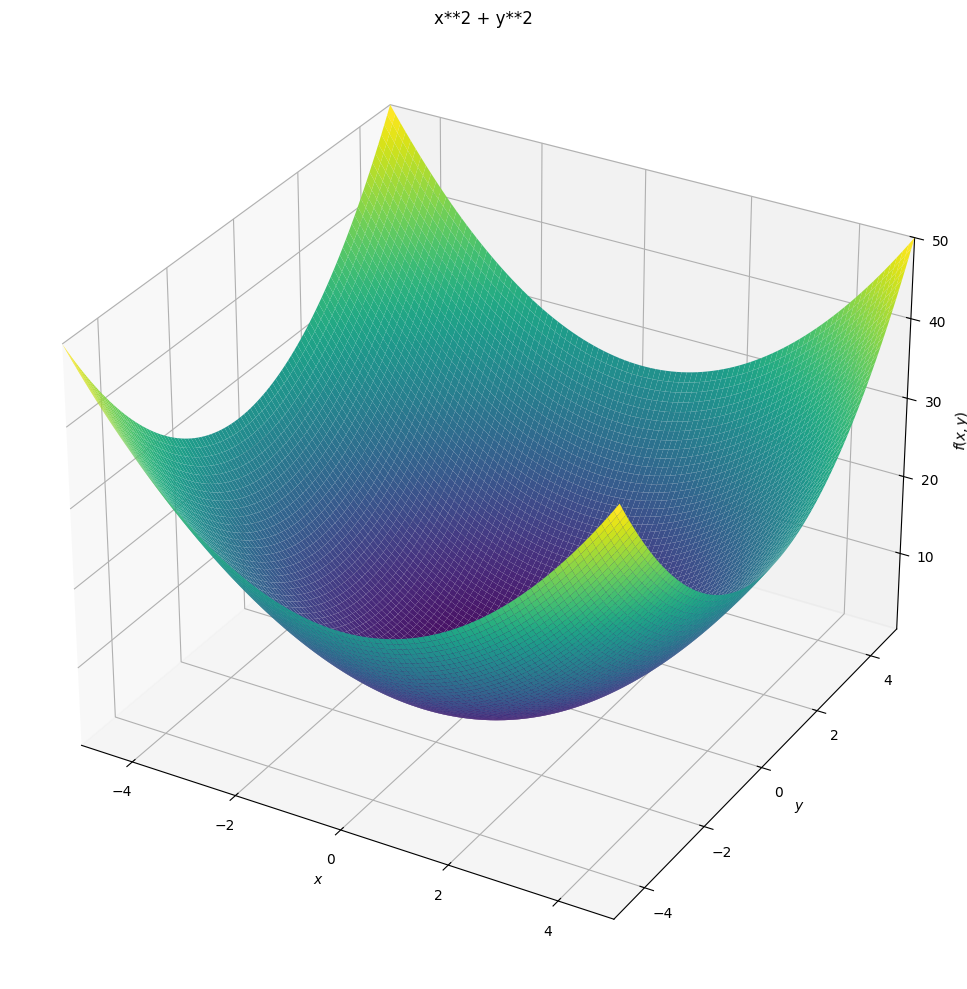

In [16]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

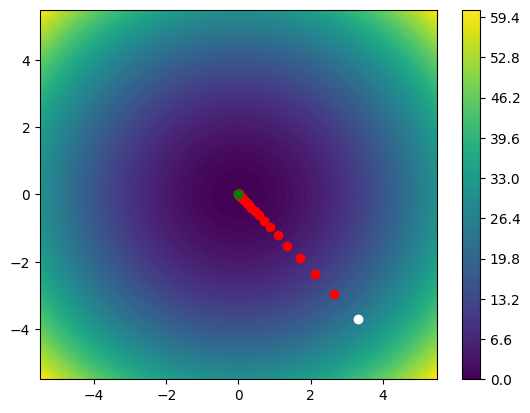

Solucion: [4.728714652111598e-05, -5.2921732578010864e-05] 5.0367840051679876e-09


In [17]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
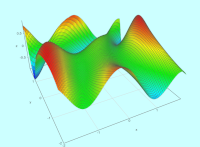


In [18]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


A continuación se muestra el código para emplear el método del descenso del gradiente para encontrar el mínimo de la función objetivo. Como la función es una multiplicación de seno y coseno su valor mínimo teórico es -1. Cuanto más se aproxime la solución a dicho resultado mejor será dicha solución.

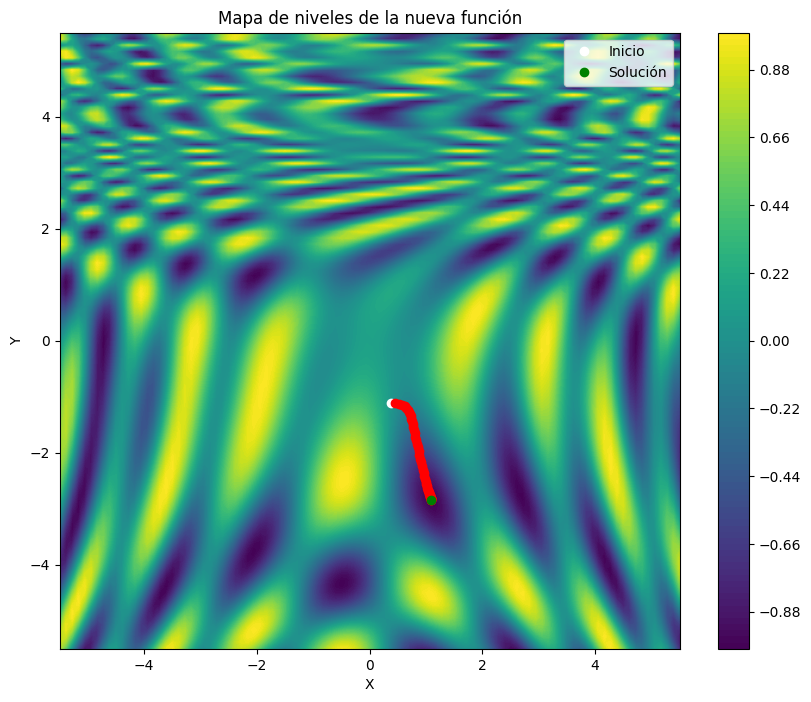

Solución: [1.094430359273069, -2.838667347333121] Valor de f en la solución: -0.9998446201763315


In [19]:
# Definimos el gradiente de la nueva función
def df(X):
    A = 0.5 * X[0]**2 - 0.25 * X[1]**2 + 3
    B = 2 * X[0] + 1 - math.exp(X[1])
    # Derivada parcial con respecto a x
    df_dx = X[0] * math.cos(A) * math.cos(B) - 2 * math.sin(A) * math.sin(B)
    # Derivada parcial con respecto a y
    df_dy = -0.5 * X[1] * math.cos(A) * math.cos(B) + math.exp(X[1]) * math.sin(A) * math.sin(B)
    return [df_dx, df_dy]

# Prepara los datos para dibujar el mapa de niveles de Z
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

# Calcula los valores de Z para cada (x, y)
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        try:
            Z[iy, ix] = f([x, y])
        except OverflowError:
            Z[iy, ix] = np.nan  # Maneja posibles errores de overflow

# Pinta el mapa de niveles de Z
plt.figure(figsize=(10, 8))
contour = plt.contourf(X, Y, Z, resolucion, cmap='viridis')
plt.colorbar(contour)
plt.title('Mapa de niveles de la nueva función')

# Generamos un punto aleatorio inicial y lo pintamos de blanco
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white", label='Inicio')

# Tasa de aprendizaje
TA = 0.1

# Número de iteraciones
iteraciones = 50

# Lista para almacenar los puntos visitados
puntos = [P.copy()]

# Realiza el descenso por gradiente
for _ in range(iteraciones):
    grad = df(P)
    # Actualiza las coordenadas del punto
    P[0] -= TA * grad[0]
    P[1] -= TA * grad[1]
    puntos.append(P.copy())
    plt.plot(P[0], P[1], "o", c="red")

# Dibujamos el punto final y lo pintamos de verde
plt.plot(P[0], P[1], "o", c="green", label='Solución')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Imprime la solución encontrada
print("Solución:", P, "Valor de f en la solución:", f(P))


Se ha obtenido una solución de -0.9998446201763315 que es practicamente -1 por tanto el método ha sido correctamente aplicado y los hiperparámetros seleccionados, aunque no consiguen llegar a la mejor solución de -1, se han quedado bastante cerca, demostrando ser muy competentes.